In [1]:
import torch
import cv2
from pathlib import Path
from matplotlib import pyplot as plt
from IPython.core.display import HTML

import deepdoctection as dd


import os

os.environ['DD_USE_TORCH'] = '1'


analyzer = dd.get_dd_analyzer(config_overwrite=["LANGUAGE='eng'"])

path = "/Users/alexandreclin/Desktop/test/report.pdf"

df = analyzer.analyze(path=path)
# This method must be called just before starting the iteration. It is part of the API.
df.reset_state()

os.environ['TESSDATA_PREFIX'] = '/opt/homebrew/Cellar/tesseract/5.4.1/share/tessdata'

doc = iter(df)
page = next(doc)
type(page)



/Users/alexandreclin/Desktop/Infosys Inde/test2/deepdo/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[0705 14:46.09 @dd.py:459]  INF  Config: 
 {'DEVICE': device(type='mps'),
 'LANGUAGE': 'eng',
 'LAYOUT_NMS_PAIRS': {'COMBINATIONS': None, 'PRIORITY': None, 'THRESHOLDS': None},
 'LIB': 'PT',
 'OCR': {'CONFIG': {'TESSERACT': 'dd/conf_tesseract.yaml'},
         'USE_DOCTR': False,
         'USE_TESSERACT': True,
         'USE_TEXTRACT': False,
         'WEIGHTS': {'DOCTR_RECOGNITION': {'PT': 'doctr/crnn_vgg16_bn/pt/crnn_vgg16_bn-9762b0b0.pt',
                                           'TF': 'doctr/crnn_vgg16_bn/tf/crnn_vgg16_bn-76b7f2c6.zip'},
                     'DOCTR_WORD': {'PT': 'doctr/db_resnet50/pt/db_resnet50-ac60cadc.pt',
                                    'TF': 'doctr/db_resnet50/tf/db_resnet

deepdoctection.datapoint.view.Page

In [2]:
page.get_attribute_names()

{<PageType.angle>,
 'chunks',
 'document_id',
 <PageType.document_type>,
 'file_name',
 <PageType.language>,
 'layouts',
 'location',
 'page_number',
 'tables',
 'text',
 'words'}

In [3]:
for layout in page.layouts:
    if layout.category_name=="title":
        print(f"Title: {layout.text}")

In [4]:

page.text

'This is an example of a data table.'

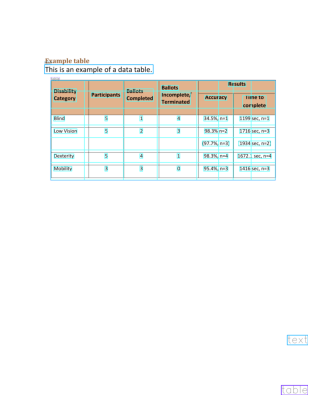

Disability Category   Ballots Completed  Ballots   Results   
  Participants   Incomplete/ Terminated  Accuracy   Time to complete  
 Blind  5  1  4  34.5%, n=1   1199 sec, n=1  
 Low Vision  5  2  3  98.3% n=2   1716 sec, n=3  
     (97.7%, n=3)   (1934 sec, n=2)  
 Dexterity  5  4  1  98.3%, n=4   1672.1 sec, n=4  
 Mobility  3  3  0  95.4%, n=3   1416 sec, n=3  

[['Disability Category ', '', 'Ballots Completed ', 'Ballots ', '', 'Results ', ''], ['', 'Participants ', '', 'Incomplete/ Terminated ', 'Accuracy ', '', 'Time to complete '], ['Blind ', '5 ', '1 ', '4 ', '34.5%, n=1 ', '', '1199 sec, n=1 '], ['Low Vision ', '5 ', '2 ', '3 ', '98.3% n=2 ', '', '1716 sec, n=3 '], ['', '', '', '', '(97.7%, n=3) ', '', '(1934 sec, n=2) '], ['Dexterity ', '5 ', '4 ', '1 ', '98.3%, n=4 ', '', '1672.1 sec, n=4 '], ['Mobility ', '3 ', '3 ', '0 ', '95.4%, n=3 ', '', '1416 sec, n=3 ']]


In [5]:
image = page.viz()
plt.figure(figsize=(10, 5))
plt.axis('off')
plt.imshow(image)
plt.show()
print(page.tables[0])
table = page.tables[0]
print(table.csv)
